# Machine Learning Project Structure - Example with House Princing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler, PolynomialFeatures
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics 
# confusion_matrix, ConfusionMatrixDisplay,
# precision_recall_fscore_support, f1_score,
# recall_score, precision_score, accuracy_score
# mean_absolute_error, mean_squared_error, r2_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Dense, Activation, Input
from tensorflow.keras.utils import to_categorical

/var/folders/7_/dryv_qwx5t15nn_mf9cj1yb40000gn/T/ipykernel_7056/3280126874.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## 1. Define the Problem and Objectives
- Clearly define the problem you are trying to solve.
- Set specific, measurable objectives.

### Description :
**Start here if...**
You have some experience with R or Python and machine learning basics. This is a perfect competition for data science students who have completed an online course in machine learning and are looking to expand their skill set before trying a featured competition. 

**Competition Description:**
Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

**Practice Skills:**
* Creative feature engineering 
* Advanced regression techniques like random forest and gradient boosting

**Acknowledgments:**
The Ames Housing dataset was compiled by Dean De Cock for use in data science education. It's an incredible alternative for data scientists looking for a modernized and expanded version of the often cited Boston Housing dataset. 

### Evaluation:

**Goal:**
It is your job to predict the sales price for each house. For each Id in the test set, you must predict the value of the SalePrice variable. 

**Metric:**
Submissions are evaluated on ```Root-Mean-Squared-Error (RMSE)``` between the logarithm of the predicted value and the logarithm of the observed sales price. (Taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally.)

**Submission File Format:**
The file should contain a header and have the following format:

Id,SalePrice<br>
1461,169000.1<br>
1462,187724.1233<br>
1463,175221<br>
etc.

## 2. Gather and Prepare Data
- Collect relevant data. This could involve data scraping, using APIs, or sourcing datasets from repositories.
- Clean and preprocess the data, dealing with missing values, outliers, and normalization.
- BOOK : 6 STEPS TO DATA PREPROCESSING EXCELLENCE

In [2]:
data_path = 'home-data-for-ml-course/'

In [3]:
with open(data_path + 'data_description.txt', 'r') as file:
    data_descript = file.read()

print(data_descript)

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [4]:
train_data = pd.read_csv(data_path + 'train.csv')
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### step 1: Handling Missing Values

In [5]:
missing_values_count = train_data.isnull().sum()
missing_values_count = missing_values_count[missing_values_count>0]
missing_values_percentage = 100 * missing_values_count/train_data.shape[0]

missing_values_percentage

LotFrontage     17.739726
Alley           93.767123
MasVnrType      59.726027
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64

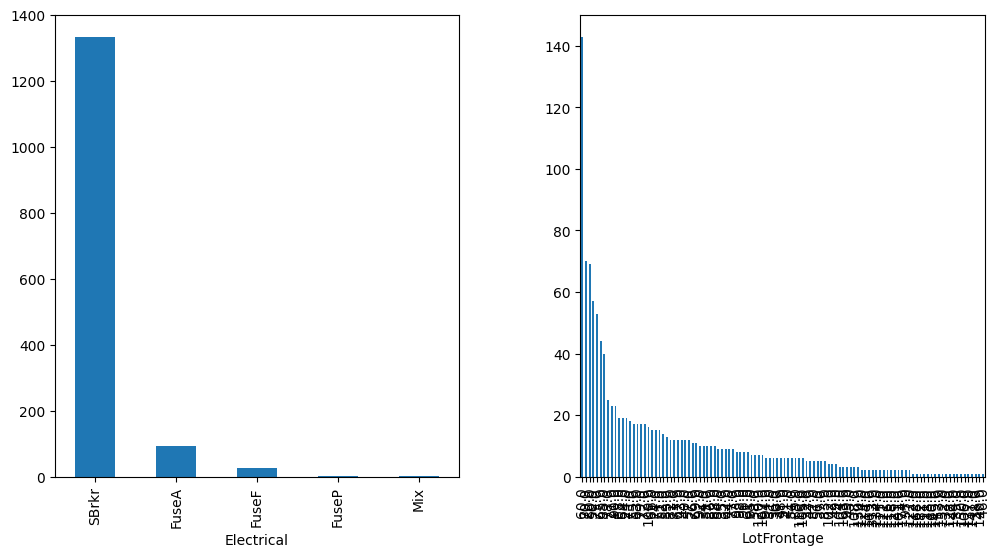

In [6]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Diagramme en barres du décompte des valeurs de la colonne 'Electrical'
train_data['Electrical'].value_counts().plot(kind='bar', ax=axes[0])
axes[0].set_xlabel('Electrical')

# Diagramme en barres du décompte des valeurs d'une autre colonne, par exemple 'AnotherColumn'
train_data['LotFrontage'].value_counts().plot(kind='bar', ax=axes[1])
axes[1].set_xlabel('LotFrontage')

# Ajuster l'espace entre les subplots si nécessaire
plt.subplots_adjust(wspace=0.3)

plt.show()

In [7]:
def HaddingMissingValues(df: pd.DataFrame, train=None):
    if not train: train = df
    df_transform = df.copy()
    
    # actually, these are not missing values
    fill = {'Alley': 'NoAlley', 'MasVnrType': 'NoMasVnrType', 'MasVnrArea': 0.0, 'BsmtQual': 'NoBasement',
            'BsmtCond': 'NoBasement', 'BsmtExposure': 'NoBasement','BsmtFinType1': 'NoBasement',
            'BsmtFinType2': 'NoBasement', 'FireplaceQu': 'NoFireplace', 'GarageType': 'NoGarage',
            'GarageFinish': 'NoGarage', 'GarageQual': 'NoGarage', 'GarageCond': 'NoGarage',
            'Fence': 'NoFence', 'MiscFeature': 'NoMiscFeature', 'PoolQC': 'NoPool',
            'GarageCars': 0.0, 'GarageArea': 0.0, 'BsmtFinSF1': 0.0,'BsmtFinSF2': 0.0,
            'BsmtUnfSF': 0.0, 'TotalBsmtSF': 0.0, 'BsmtFullBath': 0.0, 'BsmtHalfBath': 0.0,
           }
    df_transform.fillna(fill, inplace=True)

    # fill Electrical missing values with SBrkr
    df_transform.Electrical.fillna('SBrkr', inplace=True)

    # fill with df.LotFrontage.mean()
    df_transform.LotFrontage.fillna(train.LotFrontage.mean(), inplace=True)

    # fill GarageYrBlt missing values
    ## nan -> No Garage
    ## fill with df.LotFrontage.min()
    df_transform.GarageYrBlt.fillna(train.LotFrontage.min(), inplace=True)

    # for others missing values
    for col in df_transform.columns:
        if df_transform[col].isna().sum()>0:
            if df_transform[col].dtype == 'object': df_transform[col].fillna('UNKNOW', inplace=True)
            else : df_transform[col].fillna(train[[col]].mean(), inplace=True)

    missing = df_transform.isna().any().any()
    return df_transform, missing

### step 2: types verification

In [8]:
def TypeVerif(df: pd.DataFrame):
    tmp_types = dict(df.dtypes)
    float_string_columns = []
    
    for k in tmp_types.keys():
        if(tmp_types[k] == 'object'):
            try:
                float(df[k][0])
                float_string_columns.append(k)
            except (ValueError, TypeError):
                continue
    
    if len(float_string_columns)==0:
        return True
    return False

### step 3: Encoding Categorical Variables

In [9]:
def EncodeCategorical(df: pd.DataFrame, encoder=None, cols= []):
    df_cat = df.select_dtypes(include=['object'])
    if not encoder:
        encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore', drop= 'first')
        df_cat_encoded = encoder.fit_transform(df_cat)
        cols = df_cat.columns
    else: df_cat_encoded = encoder.transform(df_cat)
    df_transform = pd.concat([pd.DataFrame(df_cat_encoded, columns=encoder.get_feature_names_out(cols)),
                       df.drop(columns=df_cat.columns).reset_index(drop=True)] ,axis=1)
    return df_transform, encoder, cols

### step 4: Feature Scaling

In [10]:
def FeatureScaling(df: pd.DataFrame, scaler=None):
    df_scale = df.copy()
    if not scaler:
        scaler = MinMaxScaler()
        df_scale = scaler.fit(df)
    df_scale = pd.DataFrame(scaler.transform(df), columns= df.columns)
    return df_scale, scaler

### step 5: Transform train_data and test_data

In [11]:
class TransformData:
    def __init__(self):
        self.encoder = None
        self.cat_cols = None
        self.scaler = None

    def fit_transform(self, df: pd.DataFrame):
        df_transform = df.drop(['Id','SalePrice'], axis=1)
        df_transform, missing = HaddingMissingValues(df_transform)
        assert(missing==False)
        assert(TypeVerif(df_transform))
        df_cat, self.encoder, self.cat_cols = EncodeCategorical(df_transform)
        df_transform, self.scaler = FeatureScaling(df_cat)
        return df_transform
        
    def transform(self, df: pd.DataFrame):
        df_transform = df.drop(['Id'], axis=1)
        df_transform, missing = HaddingMissingValues(df_transform)
        assert(missing==False)
        assert(TypeVerif(df_transform))
        df_cat, _, _ = EncodeCategorical(df_transform, encoder=self.encoder, cols= self.cat_cols)
        df_transform, _ = FeatureScaling(df_cat, scaler=self.scaler)
        return df_transform

In [12]:
tranform_data = TransformData()
X = tranform_data.fit_transform(train_data)

Y = train_data['SalePrice']

/var/folders/7_/dryv_qwx5t15nn_mf9cj1yb40000gn/T/ipykernel_7056/637094642.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_transform.Electrical.fillna('SBrkr', inplace=True)
/var/folders/7_/dryv_qwx5t15nn_mf9cj1yb40000gn/T/ipykernel_7056/637094642.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values a

In [13]:
X.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_NoAlley,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.386460,0.000000,0.111517,0.000000,0.0,0.0,0.0,0.0,0.090909,0.50
1,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.324401,0.347725,0.000000,0.000000,0.0,0.0,0.0,0.0,0.363636,0.25
2,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.428773,0.000000,0.076782,0.000000,0.0,0.0,0.0,0.0,0.727273,0.50
3,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.452750,0.000000,0.063985,0.492754,0.0,0.0,0.0,0.0,0.090909,0.00
4,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.589563,0.224037,0.153565,0.000000,0.0,0.0,0.0,0.0,1.000000,0.50


In [14]:
test_data = pd.read_csv(data_path + 'test.csv')
X_test = tranform_data.transform(test_data)

X_test.head()

/var/folders/7_/dryv_qwx5t15nn_mf9cj1yb40000gn/T/ipykernel_7056/637094642.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_transform.Electrical.fillna('SBrkr', inplace=True)
/var/folders/7_/dryv_qwx5t15nn_mf9cj1yb40000gn/T/ipykernel_7056/637094642.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values a

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_NoAlley,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.514810,0.163361,0.000000,0.0,0.0,0.25,0.0,0.000000,0.454545,1.0
1,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.220028,0.458576,0.065814,0.0,0.0,0.00,0.0,0.806452,0.454545,1.0
2,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.339915,0.247375,0.062157,0.0,0.0,0.00,0.0,0.000000,0.181818,1.0
3,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.331453,0.420070,0.065814,0.0,0.0,0.00,0.0,0.000000,0.454545,1.0
4,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.356841,0.000000,0.149909,0.0,0.0,0.30,0.0,0.000000,0.000000,1.0


### step 5: Handling Outliers

In [15]:
# Interquartile Range (IQR) Method
## Calcul de l'écart interquartile (IQR) pour chaque colonne

#Q1 = X_encoded_scaled_df.quantile(0.25) #  25e percentile
#Q3 = X_encoded_scaled_df.quantile(0.75) #  75e percentile
#IQR = Q3 - Q1

In [16]:
# keep_rows = ((X_encoded_scaled_df >= (Q1 - 1.5 * IQR)) & (X_encoded_scaled_df <= (Q3 + 1.5 * IQR)))

In [17]:
# X_encoded_scaled_noutilers_df = X_encoded_scaled_df[keep_rows.all(axis=1)]
# y = y[keep_rows.all(axis=1)]

In [18]:
# X_encoded_scaled_noutilers_df.shape

## 3. Exploratory Data Analysis (EDA):
* Conduct an initial investigation on your data to discover patterns, spot anomalies, test hypotheses, and check assumptions.
* Use statistical summaries and visualizations to understand the data better.

In [19]:
X.shape

(1460, 259)

### Step 1: correlation matrix

In [20]:
matrice_corr = pd.concat([X, Y], axis=1).corr()
matrice_corr.shape

(260, 260)

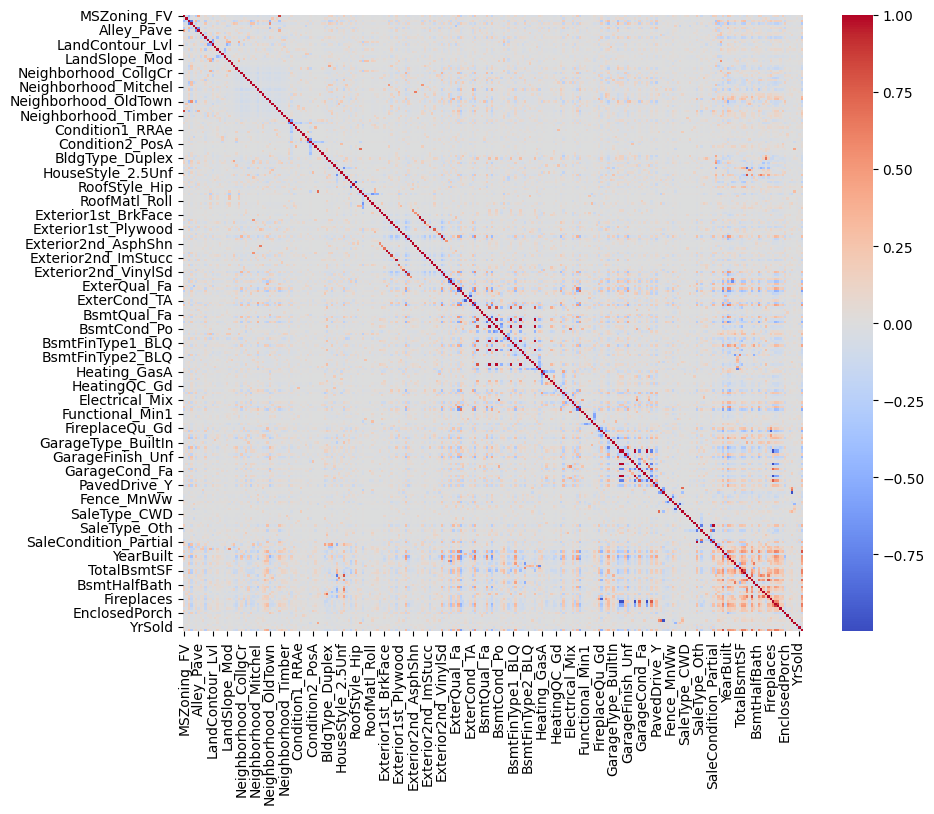

In [21]:
plt.figure(figsize=(10,8))
sns.heatmap(matrice_corr, annot=False, cmap='coolwarm')
plt.show()

### Step 2: remove redondants columns

In [22]:
# col_i is redondant if cov(col_i,col_j)=1 for any j>i
rv_columns = []
n = matrice_corr.shape[1]
cols = matrice_corr.columns

for i in range(1,n):
    corr_i = dict(matrice_corr[cols[i]])
    for j in range(i+1, n):
        if corr_i[cols[j]] == 1:
            rv_columns.append(cols[i])
            break
            
print(rv_columns)

['Exterior1st_CBlock', 'BsmtQual_NoBasement', 'BsmtCond_NoBasement', 'GarageType_NoGarage', 'GarageFinish_NoGarage', 'GarageQual_NoGarage']


In [23]:
X_new = X.drop(rv_columns, axis=1)
X_test_new = X_test.drop(rv_columns, axis=1)

print('X_new.shape:', X_new.shape)
print('X_test_new.shape:', X_test_new.shape)

X_new.shape: (1460, 253)
X_test_new.shape: (1459, 253)


In [24]:
# correlations beetween SalePrice and others columns
Z = pd.concat([X_new, Y], axis=1)
matrice_corr = Z.corr()
SalePrice_corr = matrice_corr.SalePrice

In [25]:
most_correlated = SalePrice_corr[abs(SalePrice_corr)>0.6]
most_correlated

OverallQual    0.790982
TotalBsmtSF    0.613581
1stFlrSF       0.605852
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
SalePrice      1.000000
Name: SalePrice, dtype: float64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


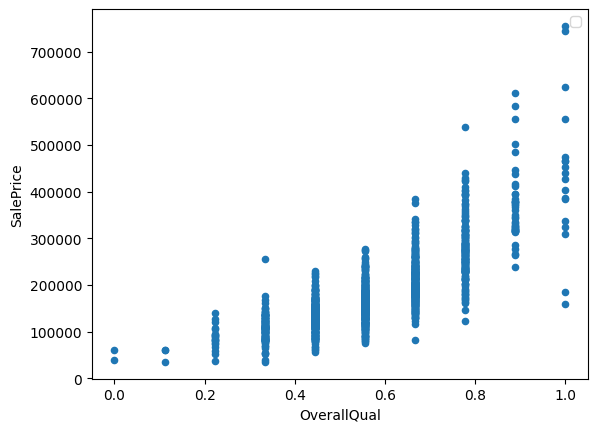

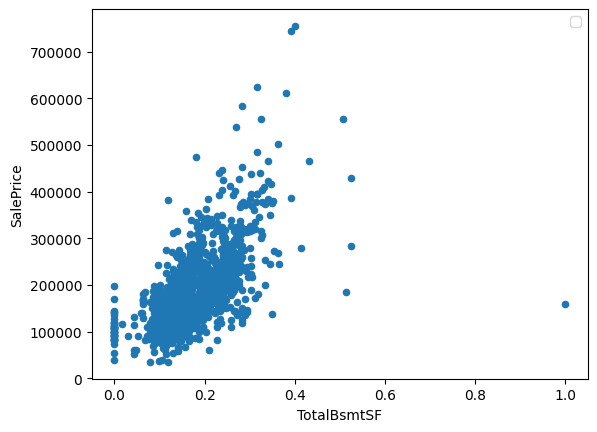

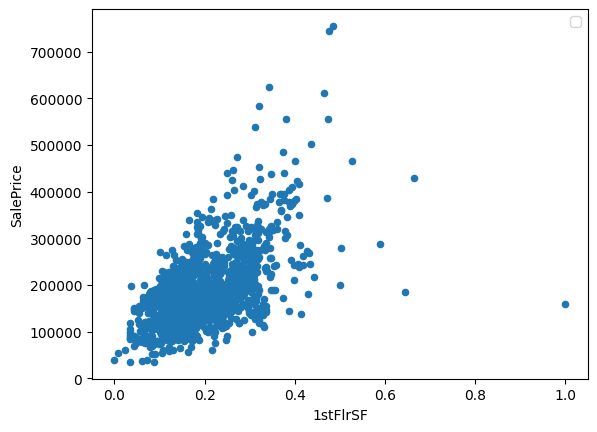

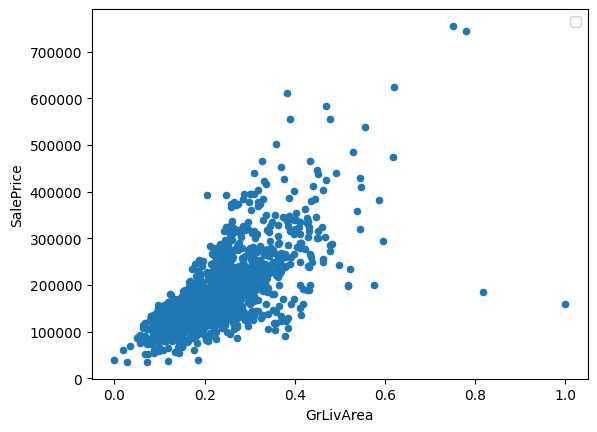

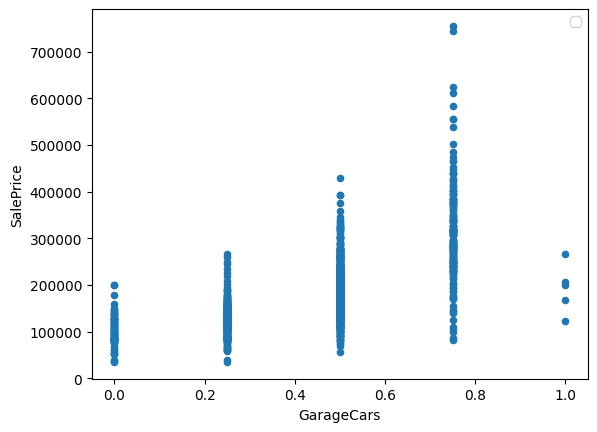

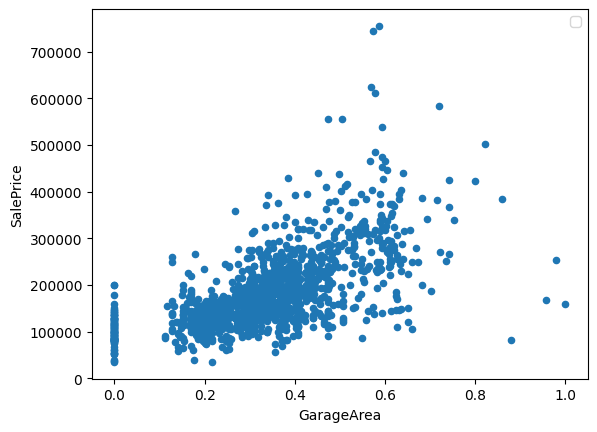

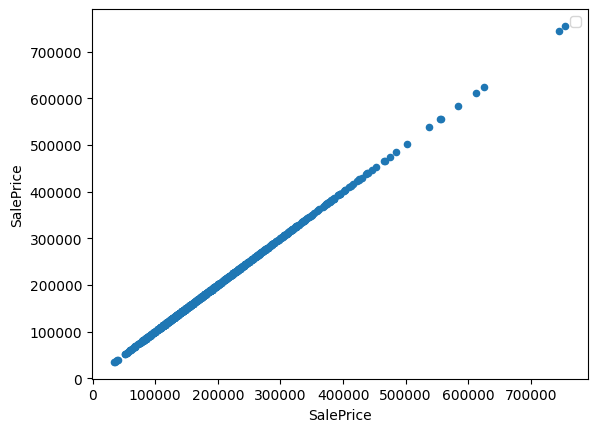

In [26]:
n = len(most_correlated.index)
for i in range(n):
    Z.plot(x= most_correlated.index[i], y='SalePrice', kind='scatter', subplots=True)

## 4. Model Selection and Training:
* Choose appropriate machine learning models based on the problem type (e.g., regression, classification).
* Train models on your data. Consider splitting your data into training and validation sets.

In [27]:
X = X_new.values
y = Y.values

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)

In [28]:
print('X_train.shape:', X_train.shape)
print('y_train.shape:', y_train.shape)
print()
print('X_valid.shape:', X_valid.shape)
print('y_valid.shape:', y_valid.shape)

X_train.shape: (1022, 253)
y_train.shape: (1022,)

X_valid.shape: (438, 253)
y_valid.shape: (438,)


In [29]:
def make_submission(y_test_pred, filename= 'submission'):
    submission = pd.DataFrame({'Id': test_data.Id, 'SalePrice': y_test_pred})
    submission.to_csv(filename+'.csv', index=False)

### first model: RandomForest

In [30]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(criterion='absolute_error',
                                 n_estimators=200, random_state=42) # best a gridsearch
rf_model.fit(X_train, y_train)

y_train_pred = rf_model.predict(X_train)
y_valid_pred = rf_model.predict(X_valid)
print('mae on train:', metrics.mean_absolute_error(y_train, y_train_pred))
print('mae on test:', metrics.mean_absolute_error(y_valid, y_valid_pred))

mae on train: 6860.519119373777
mae on test: 16969.037260273974


In [31]:
# high bias
# high variance

In [32]:
# first entry
rf_model.fit(X, y)
y_pred = rf_model.predict(X)
print('mae on fit data:', metrics.mean_absolute_error(y, y_pred))

mae on fit data: 6426.434390410959


In [33]:
## predict test
X_test = X_test_new.values
y_test_pred = rf_model.predict(X_test)

## submission
#make_submission(y_test_pred, filename= 'rf_model')

### second model: LinearRegressor, Lasso, Ridge

In [34]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet

# LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_train_pred = lin_reg.predict(X_train)
y_valid_pred = lin_reg.predict(X_valid)
print('mae on train:', metrics.mean_absolute_error(y_train, y_train_pred))
print('mae on test:', metrics.mean_absolute_error(y_valid, y_valid_pred))

mae on train: 14140.367906066536
mae on test: 3473201005932338.5


In [35]:
# LASSO

lasso_reg = Lasso(alpha=1.0, max_iter=10000, tol=1e-4, random_state=42)
lasso_reg.fit(X_train, y_train)

y_train_pred = lasso_reg.predict(X_train)
y_valid_pred = lasso_reg.predict(X_valid)
print('mae on train:', metrics.mean_absolute_error(y_train, y_train_pred))
print('mae on test:', metrics.mean_absolute_error(y_valid, y_valid_pred))

mae on train: 12393.924053613931
mae on test: 19154.242485915544


In [36]:
# Ridge

ridge_reg = Ridge(alpha=1.0, max_iter=10000, tol=1e-4, random_state=42)
ridge_reg.fit(X_train, y_train)

y_train_pred = ridge_reg.predict(X_train)
y_valid_pred = ridge_reg.predict(X_valid)
print('mae on train:', metrics.mean_absolute_error(y_train, y_train_pred))
print('mae on test:', metrics.mean_absolute_error(y_valid, y_valid_pred))

mae on train: 14882.667572904806
mae on test: 20364.685586232103


### third model: PolynomialRegressor

In [37]:
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
X_valid_poly = poly_features.transform(X_valid)

In [38]:
# LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train_poly, y_train)

y_train_pred = lin_reg.predict(X_train_poly)
y_valid_pred = lin_reg.predict(X_valid_poly)
print('mae on train:', metrics.mean_absolute_error(y_train, y_train_pred))
print('mae on test:', metrics.mean_absolute_error(y_valid, y_valid_pred))

mae on train: 6.79946070310975e-10
mae on test: 20491.25338204884


In [39]:
# LASSO

lasso_reg = Lasso(alpha=20.0, max_iter=100000, tol=1e-4, random_state=42)
lasso_reg.fit(X_train_poly, y_train)

y_train_pred = lasso_reg.predict(X_train_poly)
y_valid_pred = lasso_reg.predict(X_valid_poly)
print('mae on train:', metrics.mean_absolute_error(y_train, y_train_pred))
print('mae on test:', metrics.mean_absolute_error(y_valid, y_valid_pred))

mae on train: 4509.231625808529
mae on test: 19146.831642090394


In [40]:
# Ridge

ridge_reg = Ridge(alpha=30.0, max_iter=10000, tol=1e-4, random_state=42)
ridge_reg.fit(X_train_poly, y_train)

y_train_pred = ridge_reg.predict(X_train_poly)
y_valid_pred = ridge_reg.predict(X_valid_poly)
print('mae on train:', metrics.mean_absolute_error(y_train, y_train_pred))
print('mae on test:', metrics.mean_absolute_error(y_valid, y_valid_pred))

mae on train: 6099.055764804645
mae on test: 18003.66626199397


### With interaction_only= True

In [41]:
poly_features = PolynomialFeatures(degree=2, interaction_only= True)
X_train_poly = poly_features.fit_transform(X_train)
X_valid_poly = poly_features.transform(X_valid)

# LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train_poly, y_train)

y_train_pred = lin_reg.predict(X_train_poly)
y_valid_pred = lin_reg.predict(X_valid_poly)
print('mae on train:', metrics.mean_absolute_error(y_train, y_train_pred))
print('mae on test:', metrics.mean_absolute_error(y_valid, y_valid_pred))

mae on train: 5.925562662854353e-10
mae on test: 20547.075179695752


### fourth model: des modèles de DNN

In [42]:
def gen_model(Layers): # [input_shape, (Dense units, Dropout), ...]
    activation = 'relu'
    model = Sequential()
    model.add(Dense(Layers[1][0], input_shape=Layers[0], activation=activation))
    for i in range(2, len(Layers)):
        l = Layers[i]
        if len(l)==2: model.add(Dropout(l[1]))
        if i == len(Layers)-1: activation='linear'
        model.add(Dense(l[0], activation=activation))
    model.compile(optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.01), loss='mean_absolute_error')
    return model

# current best Layers = [(X_train.shape[1],), (128,), (32,0.1), (1,)]

In [43]:
# archi 1

Layers = [(X_train.shape[1],), (128,), (32,0.2), (1,)]
dnn_model = gen_model(Layers= Layers)

dnn_history = dnn_model.fit(x=X_train, y=y_train, batch_size=32, epochs=1000, verbose=1)

Epoch 1/1000
32/32 [==============================] - 0s 577us/step - loss: 180557.8594
Epoch 2/1000
32/32 [==============================] - 0s 440us/step - loss: 166409.4844
Epoch 3/1000
32/32 [==============================] - 0s 465us/step - loss: 98742.2656
Epoch 4/1000
32/32 [==============================] - 0s 452us/step - loss: 49156.8203
Epoch 5/1000
32/32 [==============================] - 0s 452us/step - loss: 43138.2930
Epoch 6/1000
32/32 [==============================] - 0s 444us/step - loss: 39193.6055
Epoch 7/1000
32/32 [==============================] - 0s 449us/step - loss: 36145.3164
Epoch 8/1000
32/32 [==============================] - 0s 449us/step - loss: 33639.7656
Epoch 9/1000
32/32 [==============================] - 0s 444us/step - loss: 32061.9082
Epoch 10/1000
32/32 [==============================] - 0s 449us/step - loss: 30591.7188
Epoch 11/1000
32/32 [==============================] - 0s 440us/step - loss: 29588.2695
Epoch 12/1000
32/32 [==================

In [44]:
y_train_pred = dnn_model.predict(X_train)
y_valid_pred = dnn_model.predict(X_valid)
print('mae on train:', metrics.mean_absolute_error(y_train, y_train_pred))
print('mae on test:', metrics.mean_absolute_error(y_valid, y_valid_pred))

14/14 [==============================] - 0s 365us/step
mae on train: 11113.846834485079
mae on test: 16309.92737763984


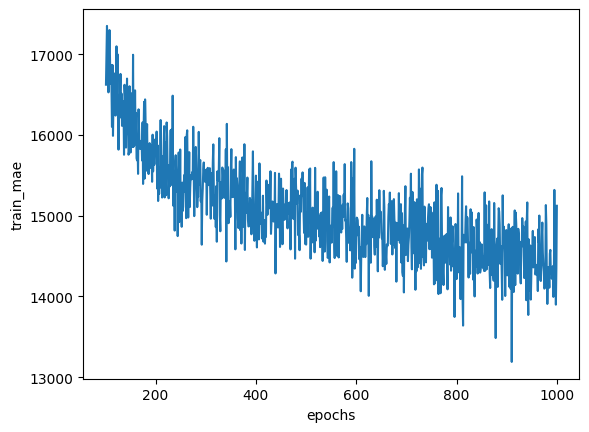

In [45]:
dep = 100
losses = dnn_history.history['loss']
plt.plot(np.arange(dep,len(losses))+1, losses[dep:])
plt.xlabel('epochs')
plt.ylabel('train_mae')
plt.show()

In [46]:
# archi 2

Layers = [(X_train.shape[1],), (128,), (64,0.2), (1,)]
dnn_model = gen_model(Layers= Layers)

dnn_history = dnn_model.fit(x=X_train, y=y_train, batch_size=32, epochs=600, verbose=1)

Epoch 1/600
32/32 [==============================] - 0s 663us/step - loss: 179714.1250
Epoch 2/600
32/32 [==============================] - 0s 544us/step - loss: 147831.5156
Epoch 3/600
32/32 [==============================] - 0s 537us/step - loss: 59264.5664
Epoch 4/600
32/32 [==============================] - 0s 464us/step - loss: 43806.2227
Epoch 5/600
32/32 [==============================] - 0s 427us/step - loss: 38791.2266
Epoch 6/600
32/32 [==============================] - 0s 488us/step - loss: 35315.8516
Epoch 7/600
32/32 [==============================] - 0s 473us/step - loss: 32528.1836
Epoch 8/600
32/32 [==============================] - 0s 478us/step - loss: 30443.1387
Epoch 9/600
32/32 [==============================] - 0s 461us/step - loss: 29252.8027
Epoch 10/600
32/32 [==============================] - 0s 469us/step - loss: 28335.4277
Epoch 11/600
32/32 [==============================] - 0s 464us/step - loss: 27755.1543
Epoch 12/600
32/32 [==============================

In [47]:
y_train_pred = dnn_model.predict(X_train)
y_valid_pred = dnn_model.predict(X_valid)
print('mae on train:', metrics.mean_absolute_error(y_train, y_train_pred))
print('mae on test:', metrics.mean_absolute_error(y_valid, y_valid_pred))

14/14 [==============================] - 0s 404us/step
mae on train: 10065.85723458904
mae on test: 15768.425014269407


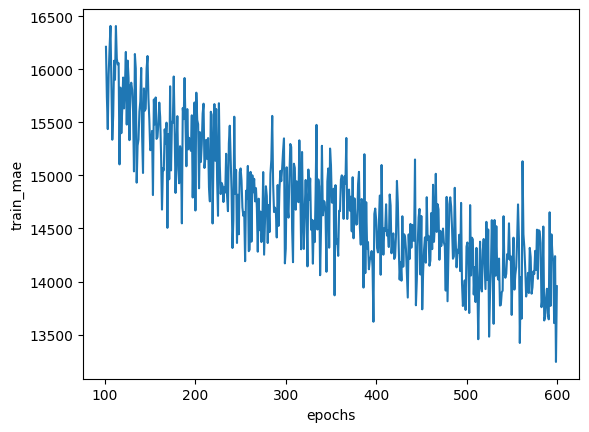

In [48]:
dep = 100
losses = dnn_history.history['loss']
plt.plot(np.arange(dep,len(losses))+1, losses[dep:])
plt.xlabel('epochs')
plt.ylabel('train_mae')
plt.show()

### Some kinf of Grid search sur les DNN

In [49]:
def grid_dnn(Layers):
    mae_train = []
    mae_valid = []
    
    for L in tqdm(Layers):
        # model
        dnn_model = gen_model(Layers= L)
        dnn_model.fit(x=X_train, y=y_train, batch_size=32, epochs=600, verbose=0)
        # predictions
        y_train_pred = dnn_model.predict(X_train)
        y_valid_pred = dnn_model.predict(X_valid)
        # loss
        mae_train.append( metrics.mean_absolute_error(y_train, y_train_pred) )
        mae_valid.append( metrics.mean_absolute_error(y_valid, y_valid_pred) )
        
    return mae_train, mae_valid

def plot_error(mae_train, mae_valid):
    plt.plot(range(len(mae_train)), mae_train, label='mae_train')
    plt.plot(range(len(mae_valid)), mae_valid, label='mae_valid')
    plt.legend()
    plt.ylabel('mae')
    plt.xlabel('models')
    plt.show()

In [50]:
Layers = [[(X_train.shape[1],), (128,), (64,0.1), (1,)],
          [(X_train.shape[1],), (128,), (64,0.2), (1,)],
          [(X_train.shape[1],), (128,), (32,0.1), (1,)],
          [(X_train.shape[1],), (150,0.1), (50,0.2), (1,)],
          [(X_train.shape[1],), (128,0.1), (32,0.2), (1,)],
        ]

In [51]:
mae_train, mae_valid = grid_dnn(Layers)

  0%|          | 0/5 [00:00<?, ?it/s]

14/14 [==============================] - 0s 354us/step


 20%|██        | 1/5 [00:08<00:34,  8.54s/it]

14/14 [==============================] - 0s 362us/step


 40%|████      | 2/5 [00:16<00:25,  8.35s/it]

14/14 [==============================] - 0s 353us/step


 60%|██████    | 3/5 [00:24<00:16,  8.23s/it]

14/14 [==============================] - 0s 458us/step


 80%|████████  | 4/5 [00:33<00:08,  8.51s/it]

14/14 [==============================] - 0s 385us/step


100%|██████████| 5/5 [00:41<00:00,  8.36s/it]


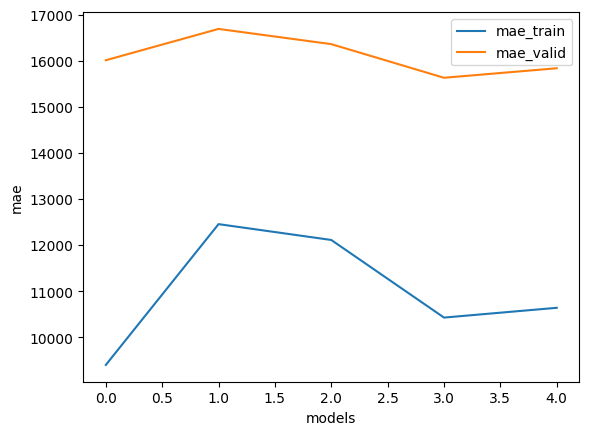

In [52]:
plot_error(mae_train, mae_valid)

In [53]:
idx = np.argmin(mae_valid)
print("dnn architecture:", Layers[idx])
print("mae on train:", mae_train[idx])
print("mae on test:", mae_valid[idx])

dnn architecture: [(253,), (150, 0.1), (50, 0.2), (1,)]
mae on train: 10429.631585585861
mae on test: 15633.402638056506


In [54]:
Layers = [(X_train.shape[1],), (150, 0.1), (50, 0.2), (1,)]
dnn_model = gen_model(Layers= Layers)

dnn_history = dnn_model.fit(x=X, y=y, batch_size=32, epochs=2000, verbose=1)

Epoch 1/2000


46/46 [==============================] - 0s 538us/step - loss: 176734.1875
Epoch 2/2000
46/46 [==============================] - 0s 485us/step - loss: 96712.7266
Epoch 3/2000
46/46 [==============================] - 0s 491us/step - loss: 45113.3750
Epoch 4/2000
46/46 [==============================] - 0s 487us/step - loss: 37795.3320
Epoch 5/2000
46/46 [==============================] - 0s 485us/step - loss: 34024.3867
Epoch 6/2000
46/46 [==============================] - 0s 493us/step - loss: 31577.2871
Epoch 7/2000
46/46 [==============================] - 0s 490us/step - loss: 29661.3262
Epoch 8/2000
46/46 [==============================] - 0s 486us/step - loss: 28585.1426
Epoch 9/2000
46/46 [==============================] - 0s 494us/step - loss: 27301.0430
Epoch 10/2000
46/46 [==============================] - 0s 488us/step - loss: 26058.4434
Epoch 11/2000
46/46 [==============================] - 0s 497us/step - loss: 25540.8164
Epoch 12/2000
46/46 [==============================] 

In [55]:
# second entry
y_pred = dnn_model.predict(X)
print('mae on fit data:', metrics.mean_absolute_error(y, y_pred))

## predict test
X_test = X_test_new.values
y_test_pred = dnn_model.predict(X_test)

46/46 [==============================] - 0s 324us/step
mae on fit data: 6522.981624571918
46/46 [==============================] - 0s 339us/step


In [56]:
## submission
make_submission(y_test_pred.reshape((-1,)), filename= 'dnn_model_2000')